# A/B Testing on Marketing Campaigns

## Introduction

This project aimed to evaluate the effectiveness of three different marketing campaigns using A/B testing and statistical analyses to determine which campaign performed best in generating sales. The campaigns, named Campaign 1, Campaign 2, and Campaign 3, were designed to engage the target audience and drive sales. With the primary goal of maximizing marketing impact, the evaluation focused on identifying whether any significant differences existed among the campaigns and determining which one would yield the highest return on investment.

To conduct this analysis, a combination of ANOVA (Analysis of Variance) and Independent Sample T-Test was employed. The ANOVA test allowed us to assess the differences among the three campaigns simultaneously, while the Independent Sample T-Tests helped further investigate specific pairwise comparisons to understand which campaigns performed significantly better. This approach ensured that the analysis was both comprehensive and precise in identifying the key insights.

The results of the A/B testing and statistical analyses have provided valuable insights into the relative performance of the campaigns, enabling us to make informed recommendations for optimizing marketing strategies. By comparing the sales outcomes of the three campaigns, this report aims to guide decision-making in resource allocation, campaign improvements, and identifying successful strategies that can be scaled up for future marketing initiatives.

### Steps in A/B Testing
1. **Designing Our Experiment - Formulating Hypothesis**
2. **Loading the data and the required libraries**
3. **Data Exploration**
4. **Statistical Analysis: Performing A/B Testing on Three Marketing Campaigns**
5. **Drawing conclusions and Recommendations**

     

### 1. **Define Hypothesis**:
   - Null Hypothesis (H0): There is no significant difference in sales between the different campaigns.
   - Alternate Hypothesis (H1): There is a significant difference in sales between the campaigns.

### 2. **Loading the data and the required libraries**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('campaigns.csv')
df.head(10)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,2,Medium,5,2,1,27.81
5,2,Medium,5,2,2,34.67
6,2,Medium,5,2,3,27.98
7,2,Medium,5,2,4,27.72
8,3,Medium,12,1,1,44.54
9,3,Medium,12,1,2,37.94


In [29]:
df.shape

(548, 6)

**The dataset contains the following columns:**

1. OutletID: Unique identifier for each outlet.
2. MarketSize: The size of the market that each outlet serves (e.g., Medium).
3. AgeofOutlets: The age (in years) of each outlet.
4. Campaigns: The campaign ID that was run for that particular outlet.
5. Week: The week number in which data is recorded.
6. SalesInThousands: The sales amount (in thousands) for each outlet during the respective week.

In [30]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 548
Columns         : 6
Features        : ['OutletID', 'MarketSize', 'AgeofOutlets', 'Campaigns', 'Week', 'SalesInThousands']
Missing Values  : 0
Unique Values   : 

OutletID            137
MarketSize            3
AgeofOutlets         25
Campaigns             3
Week                  4
SalesInThousands    517
dtype: int64


In [31]:
df.describe()

,OutletID,AgeofOutlets,Campaigns,Week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


**The summary statistics - key insights into the dataset:**

1. **Count**: There are 548 rows for all columns, meaning there are no missing values.

2. **Mean (Average)**:
   - **AgeofOutlets**: The average age of the outlets is about 8.5 years.
   - **Campaigns**: On average, outlets are subjected to campaign type "2".
   - **SalesInThousands**: The average sales per week for an outlet is around USD53.47K.

3. **Standard Deviation (std)**:
   - **AgeofOutlets** has a high standard deviation (6.64), indicating significant variation in the age of the outlets.
   - **SalesInThousands** also has a high standard deviation (16.76), implying considerable fluctuation in weekly sales figures.

4. **Minimum and Maximum**:
   - **AgeofOutlets** ranges from 1 year to 28 years, showing diverse outlet ages.
   - **Campaigns** has a range from 1 to 3, meaning there are three different campaigns being tested.
   - **SalesInThousands** ranges from USD17.34K to USD99.65K.

5. **Percentiles (25%, 50%, 75%)**:
   - **SalesInThousands**:
     - 25th percentile is USD42.55K, which means 25% of the weekly sales are below this value.
     - Median (50%) is USD50.20K, meaning half of the weeks have sales below USD50.20K.
     - 75th percentile is USD60.48K, showing that 75% of the weekly sales are below this value.

### Key Takeaways
- The sales values show substantial variation, which might be linked to outlet age, market size, or the type of campaign run.
- The distribution of campaign IDs (ranging from 1 to 3) means that the dataset contains data from three different campaigns, which is useful for A/B testing analysis.



### 3. **Data Exploration**

#### 3.1 Sales Distribution Across the 3 Different Promotions

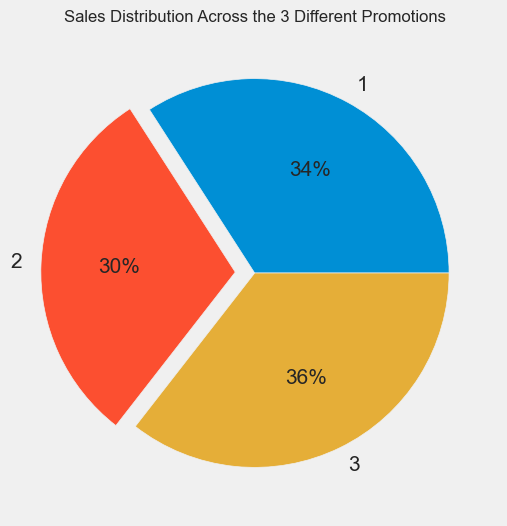

In [63]:
plt.style.use('fivethirtyeight')
ax = df.groupby('Campaigns').sum()['SalesInThousands'].plot.pie(figsize=(30,6),
                                                                autopct='%1.0f%%',
                                                                explode = (0, 0.1, 0),
                                                                textprops = {'fontsize' : 15})
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions', fontsize = 12)

plt.show()

**Key Insights:**
- Campaign 1 and Campaign 3 have the largest shares of total sales, while Campaign 2 has a notably smaller share.

This insight can be useful for stakeholders to decide which campaign strategies to continue or improve.

#### 3.2 Sales Distribution Across Different Campaigns

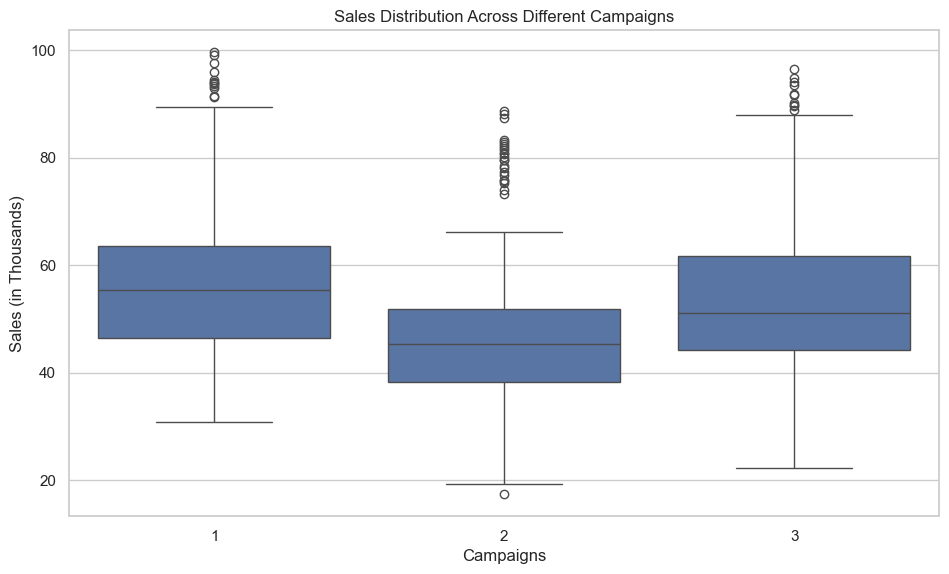

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualizing sales across different campaigns using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaigns', y='SalesInThousands', data=df)
plt.title('Sales Distribution Across Different Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Sales (in Thousands)')
plt.show()


The boxplot above shows the **distribution of sales across different campaigns**:

- **Campaign 1**: 
  - The median sales are higher compared to the other campaigns.
  - There is a wider range of sales, indicating that the sales values have more variability.
  - There are several outliers above the upper whisker, indicating higher-than-expected sales for some outlets.

- **Campaign 2**:
  - The median sales are lower compared to Campaign 1 and Campaign 3.
  - The sales distribution is narrower, indicating less variability compared to Campaign 1.
  - There are also some outliers above and below the whiskers, showing variability in performance.

- **Campaign 3**:
  - The median sales are closer to Campaign 1 but still slightly lower.
  - There is also considerable variability in sales values.
  - There are outliers above the whisker, but fewer compared to Campaign 1.

### Key Takeaways:
- **Campaign 1** appears to have the highest median sales, but also the highest variability.
- **Campaign 2** seems to have lower median sales with less variability, but it may not be the most effective campaign given its performance.
- **Campaign 3** is a balanced option with a good median sales and mod to proceed with that?

In [34]:
campaign_sales_summary = df.groupby('Campaigns')['SalesInThousands'].describe()
campaign_sales_summary

,count,mean,std,min,25%,50%,75%,max
Campaigns,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


In [35]:
# Recalculate IQR, lower whisker, and upper whisker correctly

# Extract Q1, Q3, and calculate IQR
campaign_sales_summary['Q1'] = campaign_sales_summary['25%']
campaign_sales_summary['Q3'] = campaign_sales_summary['75%']
campaign_sales_summary['IQR'] = campaign_sales_summary['Q3'] - campaign_sales_summary['Q1']

# Calculate the lower whisker using the formula: max(Min, Q1 - 1.5 * IQR)
campaign_sales_summary['Lower Whisker'] = campaign_sales_summary[['min', 'Q1']].apply(
    lambda row: max(row['min'], row['Q1'] - 1.5 * campaign_sales_summary.loc[row.name, 'IQR']), axis=1
)

# Calculate the upper whisker using the formula: min(Max, Q3 + 1.5 * IQR)
campaign_sales_summary['Upper Whisker'] = campaign_sales_summary[['max', 'Q3']].apply(
    lambda row: min(row['max'], row['Q3'] + 1.5 * campaign_sales_summary.loc[row.name, 'IQR']), axis=1
)

# Create a separate dataframe for minimum and maximum whiskers for each campaign
whiskers_df = campaign_sales_summary[['Lower Whisker', 'Upper Whisker']].reset_index()
whiskers_df.columns = ['Campaign', 'Min Whisker', 'Max Whisker']

# Round the whiskers values to 2 decimal places
whiskers_df = whiskers_df.round(2)

print(whiskers_df)


   Campaign  Min Whisker  Max Whisker
0         1        30.81        89.51
1         2        17.81        72.11
2         3        22.18        88.04


#### Now let's view the promotions for each market size

In [36]:
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID']

Campaigns  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: OutletID, dtype: int64

In [37]:
# Using unstack
df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Campaigns,,,
1,56,96,20
2,64,108,16
3,48,116,24


#### 3.3 Breakdowns of Market Sizes across Different Campaigns

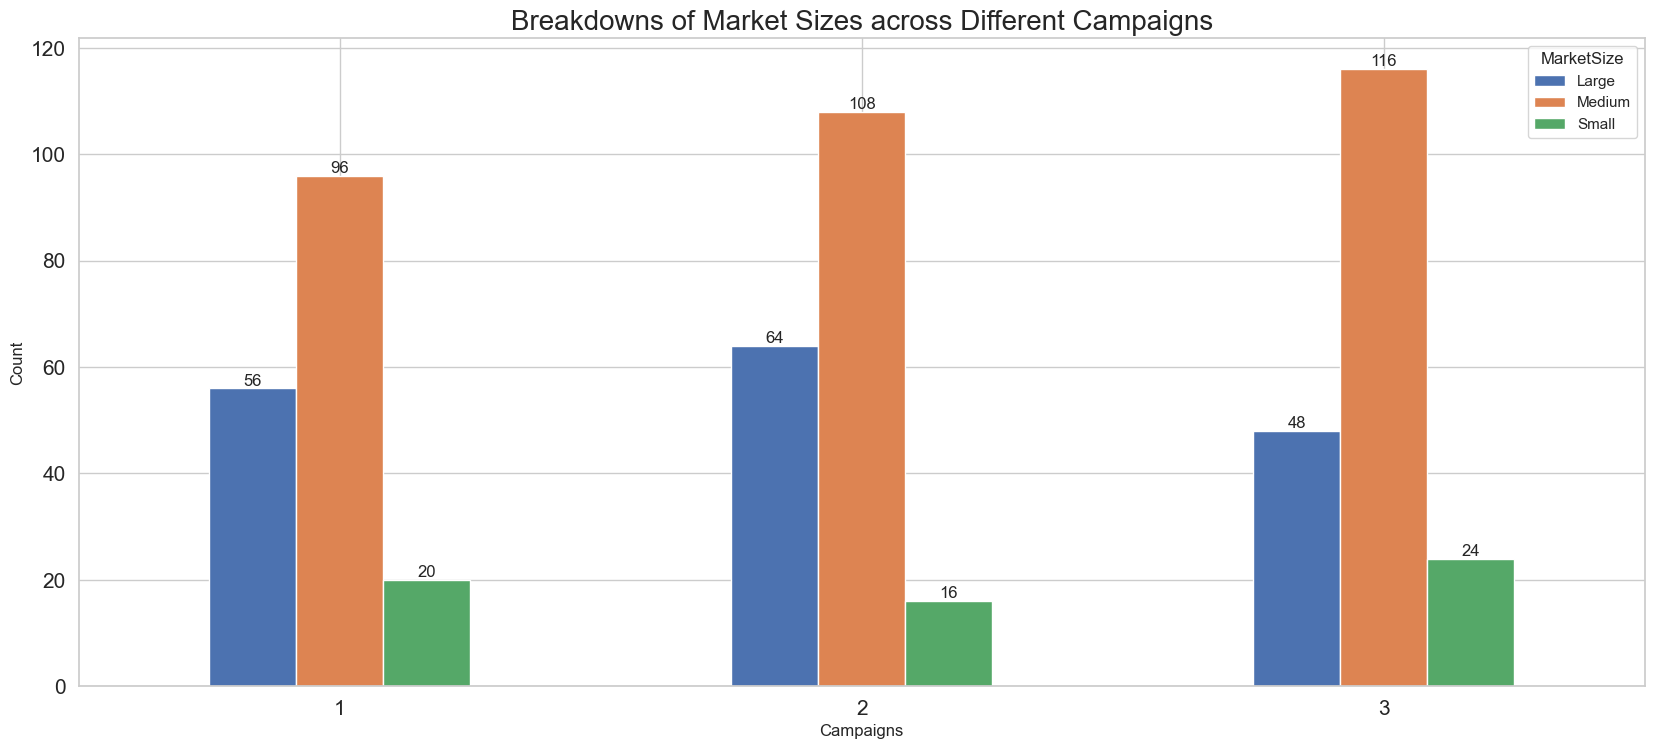

In [38]:
# Creating the bar chart as described by the user
ax = df.groupby(['Campaigns', 'MarketSize']).count()['OutletID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(18, 8),
    grid=True
)

ax.tick_params(axis='x', labelsize=15)
plt.xticks(rotation='horizontal')
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Count')
ax.set_title('Breakdowns of Market Sizes across Different Campaigns', fontsize=20)

# Display the actual count values on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()


**Insights**:
1. **Campaign 1**:
   - The distribution across **Small**, **Medium**, and **Large** markets is relatively balanced.
   - It has a consistent presence across all three market sizes, indicating that Campaign 1 targeted outlets of all market sizes equally.

2. **Campaign 2**:
   - There is a **significantly higher count in the Medium market** compared to the Small and Large markets.
   - This suggests that Campaign 2 was more focused on or better received in medium-sized markets.

3. **Campaign 3**:
   - **Campaign 3 shows the largest count in the Medium market**.
   - The number of outlets in the Medium market is notably higher than those in the Small and Large markets, suggesting that Campaign 3 was largely targeted at or performed best in medium-sizre another analysis?

#### 3.4 Overall Distributions Outlet Ages

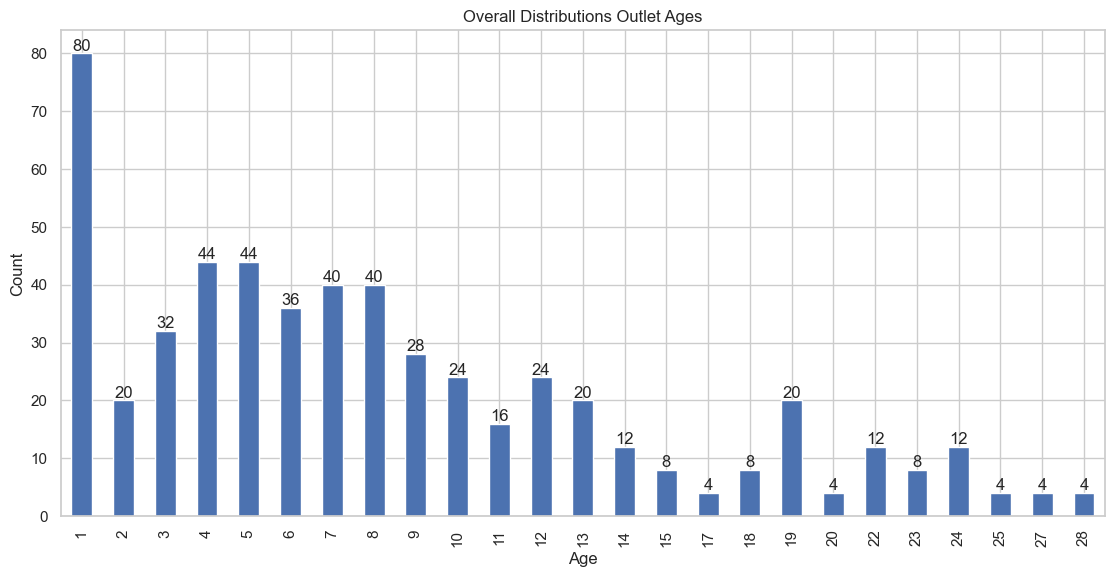

In [39]:
ax = df.groupby('AgeofOutlets').count()['OutletID'].plot(
    kind='bar', 
    figsize=(12,6),
    grid=True)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Outlet Ages')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

### Key Insights:

1. **Peak Ages**:
   - **Age 1 year** has the **highest count with 80 outlets**. This suggests a significant recent expansion in the number of new outlets, indicating a strong push for growth or favorable market conditions leading to many new openings.
   - This is much higher compared to other age groups, indicating that a majority of outlets in the dataset were established very recently.

2. **Other High Counts**:
   - **Ages 4 and 5 years** also have significant numbers44 3 and 22 outlets**, respectively. This suggests another notable growth period in the past, but not as substantial as the recent surge at3that time.

4. **Older Outlets (Above 10 Years)**:
   - Outlets older than **10 years** generally have lower counts, with **24 outlets at age 12** being an exception.
   - The trend shows that there are fewer older outlets, which may indicate difficulties in sustaining operations over long periods, possibly due to changing market dynamics or increas4d competition.

5. **Recent Expansion**:
   - The very high count at **age 1 year** suggests that there has been a **recent push for rapid expansion**.
   - This might be due to a strategic focus on growth, favorable market conditions, or the launch of a new campaign 

#### 3.5 Comparison of Outlet Ages by Market Size

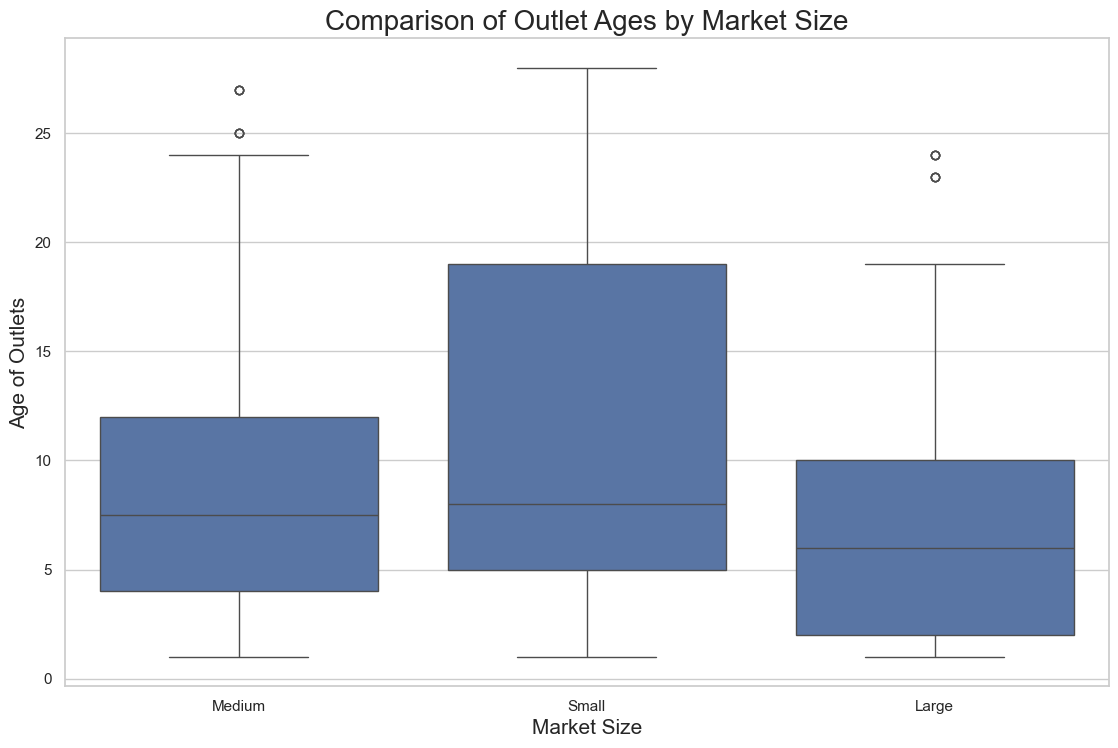

In [40]:
# Creating a boxplot to compare outlet ages by market size
plt.figure(figsize=(12, 8))
sns.boxplot(x='MarketSize', y='AgeofOutlets', data=df)
plt.title('Comparison of Outlet Ages by Market Size', fontsize=20)
plt.xlabel('Market Size', fontsize=15)
plt.ylabel('Age of Outlets', fontsize=15)

plt.show()


The boxplot compares the **ages of outlets across different market sizes (Small, Medium, Large)**:

### Insights:
1. **Small Market Size**:
   - The **median age** of outlets in the small market is higher compared to the other market sizes, suggesting that these outlets are relatively older.
   - The **interquartile range (IQR)** for the small market is also wider, indicating more variability in outlet ages. This suggests that the small market consists of both newer and older outlets.

2. **Medium Market Size**:
   - Outlets in the **medium market** have a **lower median age** compared to the small market, implying that they are generally newer.
   - The distribution is also skewed towards younger outlets, which could be a result of recent expansions or newly opened outlets targeting medium-sized markets.

3. **Large Market Size**:
   - The **large market** has the **youngest outlets on average**, with a lower median age compared to both the small and medium markets.
   - The distribution is quite compact, with fewer older outlets, suggesting that the large market consists predominantly of recently established outlets. This could indicate a strategic focus on expanding into larger markets recently.

### Summary:
- **Small markets** tend to have **older outlets** with a higher median age and greater variability.
- **Medium markets** have a mix of both older and newer outlets, but generally tend to skew towards younger ones.
- **Large markets** have **newer outlets**, with a lower median age and a compand with the ANOVA test?

#### 3.6 Stacked Distribution of Age of Outlets by Campaigns

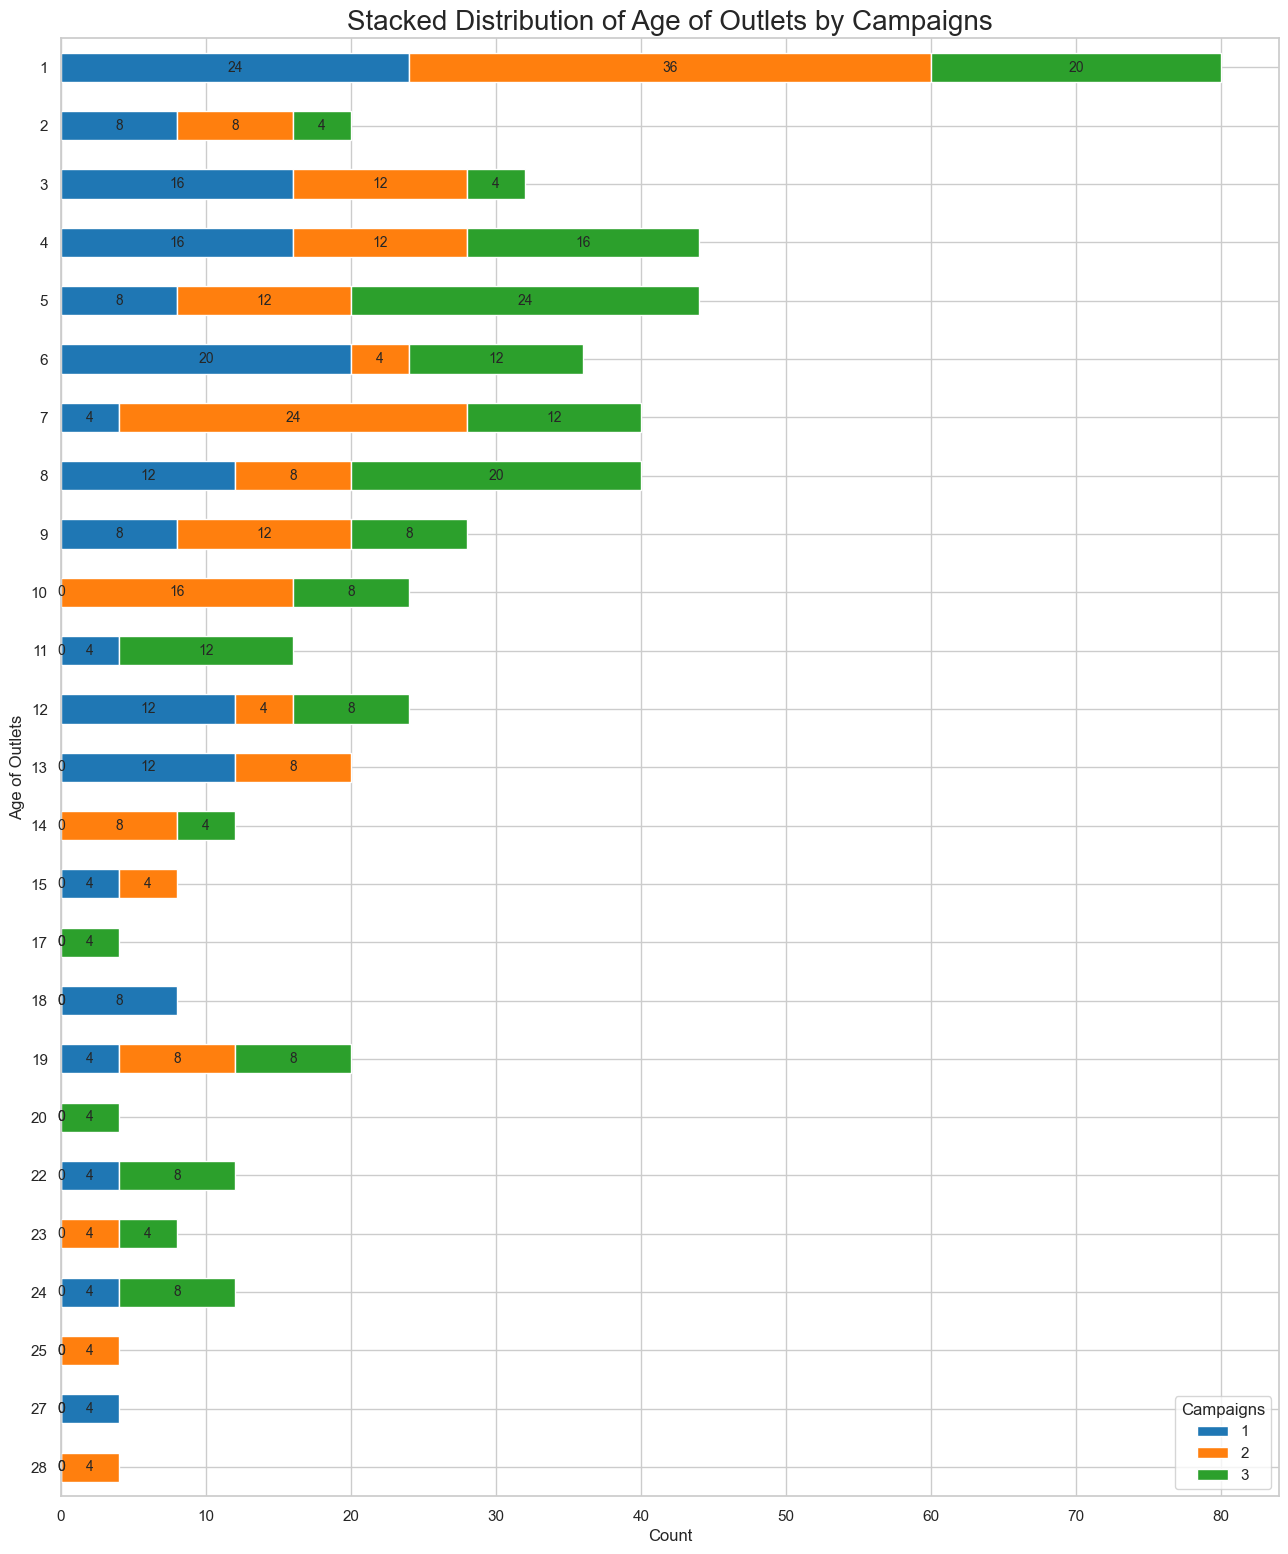

In [41]:
# Creating a stacked bar chart to visualize the distribution of campaigns by outlet age more effectively
ax = df.groupby(['AgeofOutlets', 'Campaigns']).count()['OutletID'].unstack('Campaigns').iloc[::-1].plot(
    kind='barh',
    figsize=(14, 18),
    stacked=True,
    grid=True,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)

ax.set_ylabel('Age of Outlets')
ax.set_xlabel('Count')
ax.set_title('Stacked Distribution of Age of Outlets by Campaigns', fontsize=20)

# Display the actual count values on the bars for better clarity
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.show()


#### Key Insights:

1. **Age 1 Year**:
   - **Age 1** has the **highest count of outlets**, with contributions from all three campaigns.
   - **Campaign 2** has contributed significantly, showing that this campaign has been focused on newer outlets, suggesting an emphasis on recent growth.

2. The **stacked bar chart** provides a clear picture of how each campaign contributed across the different outlet ages.

This visualization helps stakeholders easily understand the impact of each campaign across various outlet ages, supporting data-driven decisions on campaign adjustments or focus.



#### 3.7 Summary statistics for Age of Outlets across the different campaigns

In [42]:
df.groupby('Campaigns').describe()['AgeofOutlets']

,count,mean,std,min,25%,50%,75%,max
Campaigns,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0



#### Insights from Descriptive Statistics:

1. **Average Outlet Age (Mean)**:
   - **Campaign 1**: The average outlet age is **8.28 years**.
   - **Campaign 2**: The average outlet age is **7.98 years**.
   - **Campaign 3**: The average outlet age is **9.23 years**.
   - The average outlet ages for all three campaigns are relatively similar, ranging around **8 to 9 years**. This implies that the campaigns are targeting outlets with fairly comparable ages, and there isn't a major age bias across campaigns.

2. **Standard Deviation (std)**:
   - The **standard deviation** is similar across all campaigns (approximately **6.6** years), suggesting that the variability in outlet ages is consistent for each campaign.
   - This indicates that the campaigns include both younger and older outlets, resulting in similar age distributions.

3. **Minimum and Maximum Ages**:
   - The **minimum outlet age** is **1 year** across all campaigns, indicating that every campaign includes newly opened outlets.
   - The **maximum outlet age** varies slightly:
     - **Campaign 1**: 27 years
     - **Campaign 2**: 28 years
     - **Campaign 3**: 24 years
   - This shows that each campaign has a mix of outlets, from newly established ones to those that have been around for decades.

4. **Median (50%) and Quartiles**:
   - The **median (50%) age**:
     - **Campaign 1**: **6 years**
     - **Campaign 2**: **7 years**
     - **Campaign 3**: **8 years**
   - Most outlets are younger than the **median age** of **8 years**.
   - The **25th percentile** (Q1) ranges from **3 to 5 years**, and the **75th percentile** (Q3) is around **10 to 12 years** for all campaigns. This suggests that the majority of outlets are between **3 and 12 years old**, with a concentration in# Summarynge.

### Corrected Insights:
- The **average outlet age** across all campaigns is around **8 to 9 years**. This means that, on average, the campaigns target outlets that have been operating for about 8 to 9 years.
- There is **similarity in age profiles** for each campaign, as reflected by the close means and standard deviations.
- **Most outlets are 10 to 12 years old or younger**, as indicated by the 75th percentile (Q3) value being around **10-12 years** for all campaigns.
- The presence of younger outlets (e.g., **1 to 5 years old**) is significant, indicating that all campaigns are targeting recentled additional analysis, feel free to ask!

#### 4.**Statisical Analysis: Performing A/B Testing on Three Marketing Campaigns**

#### 4.1 ANOVA Test:
    - Conduct statistical tests, such as ANOVA, to compare sales between different campaigns.
    - If ANOVA results indicate a significant difference, post-hoc tests (e.g., Tukey's HSD) can be used to find out which specific campaigns differ.

In [43]:
from scipy import stats

# Extracting sales data for each campaign; containing the sales values for Campaign 1,2,and 3 outlets.
sales_campaign_1 = df[df['Campaigns'] == 1]['SalesInThousands']
sales_campaign_2 = df[df['Campaigns'] == 2]['SalesInThousands']
sales_campaign_3 = df[df['Campaigns'] == 3]['SalesInThousands']

# Performing ANOVA test to compare means of sales across the three campaigns
anova_result = stats.f_oneway(sales_campaign_1, sales_campaign_2, sales_campaign_3)

anova_result

F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)

- Here, we use the f_oneway() function from the scipy.stats module to perform a one-way ANOVA test.
- f_oneway() compares the means of two or more independent groups—in this case, the sales values of Campaign 1, Campaign 2, and Campaign 3.
- The function takes the sales values for each campaign as separate arguments and calculates the F-statistic and p-value.

**The ANOVA test results are as follows:**

- F-statistic: 21.95
- p-value: 6.77e-10

**Interpretation:**
- The p-value is extremely small (much less than 0.05), indicating that there is a statistically significant difference in the mean sales among the three campaigns.
- This means that at least one of the campaigns leads to significantly different sales compared to the others.


#### 4.1.1 Proceeding with a Post-hoc analysis to identify which campaigns have significantly different sales.

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Performing Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=df['SalesInThousands'], groups=df['Campaigns'], alpha=0.05)

# Display the Tukey's HSD test results
print(tukey_result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------



#### Summary of Tukey's HSD Test Results:

1. **Comparison Between Campaign 1 and Campaign 2**:
   - **Mean Difference**: **-10.77** (i.e., Campaign 2 has, on average, **10.77** thousand less sales compared to Campaig In other words, Campaign 1 had 10.77 thousand higher sales on average compared to Campaign 2.n 1).
   - **p-adj** (p-value): **0.0**, which is less than **0.05**.
   - **95% Confidence Interval**: **[-14.77, -6.77]**.
   - **Reject Null Hypothesis**: **True**.
   - **Interpretation**:
     - There is a **statistically significant difference** between the mean sales of Campaign 1 and Campaign 2.
     - Campaign 1 performed **significantly better** in terms of sales compared to Campaign 2.

2. **Comparison Between Campaign 1 and Campaign 3**:
   - **Mean Difference The mean difference between Campaign 1 and Campaign 3 is -2.7.**: **-2.73**.
   - **p-adj** (p-value): **0.2444**, which is **greater than 0.05**.
   - **95% Confidence Interval**: **[-6.74, 1.27]**.
   - **Reject Null Hypothesis**: **False**.
   - **Interpretation**:
     - There is **no statistically significant difference** between the mean sales of Campaign 1 and Campaign 3.
     - This means that Campaign 1 and Campaign 3 are **similar** in terms of sales performance, as the difference in their means is not significant.

3. **Comparison Between Campaign 2 and Campaign 3**:
   - **Mean Difference**: **8.04** (i.e., Campaign 3 has, on average, **8.04** thousand more sales c In other words, Campaign 3 had, on average, 8.04 thousand higher sales compared to Campaign 2. ompared to Campaign 2).
   - **p-adj** (p-value): **0.0**, which is less than **0.05**.
   - **95% Confidence Interval**: **[4.12, 11.95]**.
   - **Reject Null Hypothesis**: **True**.
   - **Interpretation**:
     - There is a **statistically significant difference** between the mean sales of Campaign 2 and Campaign 3.
     - Campaign 3 performed **significantly better** in terms of sales #compared to Campaign 2.

### Key Insights and Analysis:
1. **Campaign 2 Performance**:
   - Campaign 2 had significantly **lower sales** compared to both Campaign 1 and Campaign 3.
   - It might suggest that Campaign 2 is **less effective**, and the marketing strategy may need to be revised or optimized.

2. **Similarity Between Campaign 1 and Campaign 3**:
   - The mean sales of Campaign 1 and Campaign 3 are **not significantly different** from each other, indicating that both campaigns were equally effective.
   - Campaign 1 and Campaign 3 could be considered as potentially **interchangeable** options, providing similar results.

3. **Improvement Opportunities**:
   - Given that Campaign 2 underperforms significantly, stakeholders should investigate why it did not perform as well. It could be due to the target audience, campaign design, or execution.
   - Emphasizing **Campaign 1 or Campaign 3** in future marketing efforts could yield be#tter results compared to Campaign 2.

### Conclusion:
- **Campaign 1 and Campaign 3** are the better-performing campaigns with no significant differences in their average sales.
- **Campaign 2** is the weakest performer, with significantly lower sales compared to the other two campaigns.
- This analysis provides clear guidance for stakeholders to consider adjustments to Campaign 2 or to favor Camvide more recommendations based on this analysis?

From the **Tukey HSD test** and the **plot**, we concluded that **Campaign 1 and Campaign 3** do not have a **statistically significant difference** in their average sales, meaning their performance is **similar** statistically. However, if we still want to determine which one might be performing **better** relative to each other, we can look into the following details:

#### Determining Which Campaign Performs Better:

1. **Mean Difference from Tukey HSD**:
   - The **Tukey HSD test** provides a **mean difference** value for each pairwise comparison.
   - For **Campaign 1 vs Campaign 3**, the mean difference indicates the **magnitude and direction** of the difference:
     - If the mean difference is **positive**, it means that **Campaign 1** has higher average sales compared to **Campaign 3**.
     - If the mean difference is **negative**, then **Campaign 3** has higher average sales compared to **Campaign 1**.

2. **Look at the Tukey HSD Results**:
   - Based on the **Tukey red earlier:
     - **Campaign 1 vs Campaign 3** had a **mean difference** of approximately **-2.73**, with a **p-value of 0.2444**.
   - Although the difference is **not statistically significant** (the p-value > 0.05), the **negative mean difference** indicates that **Campaign 3** has **slightly higher sales** compared to **Campaign 1** on average.
   - However, the difference is not large enough to be considered statistically significant.

3. **Practical Consideration**:
   - From a practical standpoint, even though **Campaign 3** shows **slightly better average sales** compared to **Campaign 1**, the difference is **small** and could be due to **natural variability** in the data.
   - The **confidence interval** crossing zero also suggests that the difference between **Campaign 1 and Campaign 3** is not consistent enough to declare one as definitively better than the other.

#### Summary:
- **Statistically**, there is **no significant difference** between **Campaign 1** and **Campaign 3**, meaning they are both equally effective.
- **Campaign 3** has a **slightly higher average** sales value compared to **Campaign 1** (mean difference of **-2.73**).
- Since the difference is **not statistically significant**, it is best to consider both campaigns as equally good from a data-doneen pesrspective.

If you want to choose between **Campthen he or shen 1 and Campaign 3**, you could consider other factors, such as:
- **Costs** associated with each campaign.
- **ROI** (Return on Investment).
- **Market Segments** targeted by each campaign.
- **Operational ease** or **prefeecision based on these factors!

In [45]:
df.head(2)

,OutletID,MarketSize,AgeofOutlets,Campaigns,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67


In [64]:
df['SalesInThousands'] = pd.to_numeric(df['SalesInThousands'], errors='coerce')
df.dropna(subset=['SalesInThousands'], inplace=True)
df['Campaigns'] = df['Campaigns'].astype('category')

means = df.groupby('Campaigns')['SalesInThousands'].mean()
stdev = df.groupby('Campaigns')['SalesInThousands'].std()
obs = df.groupby('Campaigns')['SalesInThousands'].count()

# Print the results
print(f'===== MEAN ====== \n{means}\n')
print(f'===== STANDARD DEVIATION ====== \n{stdev}\n')
print(f'===== OBSERVATIONS ====== \n{obs}\n')


===== MEAN ====== 
Campaigns
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

===== STANDARD DEVIATION ====== 
Campaigns
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

===== OBSERVATIONS ====== 
Campaigns
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64



#### 4.2 Independent Samples T-Test:

#### 4.2.1. 1st Campaign vs 2nd Campaign
Specifically, I am comparing the mean sales between Campaign 1 and Campaign 2 to determine if there is a statistically significant difference between their average sales.

**What Is an Independent Samples T-test?**

An Independent Samples T-test is a statistical test used to compare the means of two independent groups to determine whether there is a significant difference between them. In this case, the two groups are Campaign 1 and Campaign 2, and the goal is to determine whether their mean sales (SalesInThousands) are significantly different.





In [53]:
# Computing the t and p values using scipy 

t, p = stats.ttest_ind(df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


**The test involves:**

- Calculating a t-statistic (t) that measures the size of the difference relative to the variation in your data.
- Producing a p-value (p), which helps determine if the observed difference is statistically significant.

Based on the results of the **independent samples t-test** you provided:

- **t-value = 6.43**
- **p-value = 4.29e-10**

### Analysis of Results:

1. **T-Value (`t = 6.43`)**:
   - The **t-value** of **6.43** is relatively high, which suggests that the **difference between the means** of **Campaign 1** and **Campaign 2** is quite substantial compared to the variability within the groups.
   - A higher **t-value** generally indicates a greater difference between the group means, relative to the standard deviation of the sample.

2. **P-Value (`p = 4.29e-10`)**:
   - The **p-value** is **4.29e-10**, which is **significantly less than 0.05** (commonly used significance level).
   - Since the **p-value is very small** (essentially close to zero), you can **reject the null hypothesis**.
   - This means that there is **strong evidence** to suggest that there is a **statistically significant difference** in the **average sales** between **Campaign 1** and **Campaign 2**.

### Insights:

1. **Significant Difference Between Campaign 1 and Campaign 2**:
   - The **low p-value** indicates that the difference in mean sales between **Campaign 1** and **Campaign 2** is **not due to random chance**.
   - Therefore, the two campaigns perform **significantly differently** in terms of sales, with one campaign being considerably more effectir if you have further questions, feel free to ask!

**Which Campaign Is Performing Better `Campaign 1` OR `Campaign 2`:**

In [65]:
# Calculate the mean sales for each campaign to determine which one performs better
mean_sales = df.groupby('Campaigns')['SalesInThousands'].mean()

# Display the mean sales for Campaign 1 and Campaign 2
mean_sales_campaign_1 = mean_sales.loc[1]
mean_sales_campaign_2 = mean_sales.loc[2]

print(f'Mean Sales for Campaign 1: {mean_sales_campaign_1}')
print(f'Mean Sales for Campaign 2: {mean_sales_campaign_2}')


Mean Sales for Campaign 1: 58.09901162790698
Mean Sales for Campaign 2: 47.32941489361702


Based on the **mean sales** results for **Campaign 1** and **Campaign 2**:

- **Mean Sales for Campaign 1**: **58.10 thousand**.
- **Mean Sales for Campaign 2**: **47.33 thousand**.

### Analysis and Insights:

1. **Higher Mean Sales for Campaign 1**:
   - **Campaign 1** has an average sales value of **58.10 thousand**, which is significantly higher compared to **Campaign 2**, which has an average of **47.33 thousand**.
   - This indicates that **Campaign 1** is the **better-performing campaign** in terms of generating higher sales compared to **Campaign 2**.

2. **Statistically Significant Difference**:
   - From the results of the **t-test** you performed earlier, the **p-value** was extremely small (`4.29e-10`), indicating that the difference between the average sales of **Campaign 1** and **Campaign 2** is **statistically significant**.
   - This means that the observed difference in average sales is **unlikely** to be due to random chance, and it is **reliable** to conclude that **Campaign 1** performs better.


**Summary:**
- Campaign 1 is the better-performing campaign, with a mean sales value of 58.10 thousand compared to 47.33 thousand for Campaign 2.

#### 4.2.2. 1st Campaign vs 3rd Campaign

In [66]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values, 
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 1.5560224307758634
p-value = 0.12059147742229478


### Analysis of the Results:

1. **P-Value (`p = 0.1206`)**:
   - The **p-value** is **0.1206**, which is **greater than 0.05** (commonly used significance level).
   - Since the **p-value** is greater than **0.05**, it means that there is **no statistically significant difference** between the **mean sales** of **Campaign 1** and **Campaign 3**.
   - This indicates that the difference observed between the two campaigns' average sales could be due to **random variation**, rather than a genuine difference in performance.

2. **T-Value (`t = 1.56`)**:
   - The **t-value** of **1.56** is relatively low, which suggests that the difference between the two groups is not substantial compared to the variability in the data.
   - A **low t-value** typically means the difference between the means is small in relation to the variability of the groups.

### Insights:

1. **No Significant Difference Between Campaign 1 and Campaign 3**:
   - The **p-value** suggests that there is **no significant difference** between the **mean sales** of **Campaign 1** and **Campaign 3**.
   - This means that the performance of **Campaign 1** and **Campaign 3** in terms of sales is statistically similar, and we cannot conclude that one campaign is definitively better than the other based on this analysis.

2. **Business Implications**:
   - From a business perspective, since there is no statistically significant difference, it is likely that either **Campaign 1** or **Campaign 3** can be considered equally effective in generating sales.
   - This provides some flexibility in terms of choosing which campaign to continue with. The decision could be made based on other considerations, such as **cost**, **ease of execution**, or **target audience preferences**.

In [67]:
# Calculate the mean sales for Campaign 1 and Campaign 3
mean_sales = df.groupby('Campaigns')['SalesInThousands'].mean()

# Get the mean sales for Campaign 1 and Campaign 3
mean_sales_campaign_1 = mean_sales.loc[1]
mean_sales_campaign_3 = mean_sales.loc[3]

print(f'Mean Sales for Campaign 1: {mean_sales_campaign_1}')
print(f'Mean Sales for Campaign 3: {mean_sales_campaign_3}')


Mean Sales for Campaign 1: 58.09901162790698
Mean Sales for Campaign 3: 55.36446808510639


### Analysis:
- **Mean Sales for Campaign 1**: **58.10 thousand**
- **Mean Sales for Campaign 3**: **55.36 thousand**

- **Campaign 1** has a **slightly higher mean sales** value compared to **Campaign 3**.
- However, since the **p-value** from the t-test was **greater than 0.05**, the difference is **not statistically significant**, implying that **both campaigns** are likely to perform **similarly**.



#### 4.2.3. 2nd Campaign vs 3rd Campaign

In [57]:
t, p = stats.ttest_ind(
    df.loc[df['Campaigns'] == 2, 'SalesInThousands'].values, 
    df.loc[df['Campaigns'] == 3, 'SalesInThousands'].values, 
    equal_var = False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = -4.88139271089348
p-value = 1.5692733176039892e-06


### Analysis of the Results:

1. **P-Value (`p = 1.57e-06`)**:
   - The **p-value** is **1.57e-06**, which is significantly **less than 0.05** (a commonly used significance level).
   - Since the **p-value is very small**, it means that the difference between the mean sales of **Campaign 2** and **Campaign 3** is **statistically significant**.

2. **T-Value (`t = -4.88`)**:
   - The **t-value** of **-4.88** is quite large in magnitude, indicating a substantial difference between the mean sales of **Campaign 2** and **Campaign 3**.
   - The **negative sign** of the t-value indicates the direction of the difference: in this case, **Campaign 2** has **lower average sales** compared to **Campaign 3**.

### Insights:

1. **Significant Difference Between Campaign 2 and Campaign 3**:
   - The **p-value** indicates that there is a **statistically significant difference** in the sales performance of **Campaign 2** and **Campaign 3**.
   - The **negative t-value** implies that **Campaign 2** is **underperforming** compared to **Campaign 3**.
   - This means that the difference in average sales is large enough to confidently state that **Campaign 3** performs **better** than **Campaign 2**.

2. **Campaign Performance**:
   - **Campaign 3** has **higher mean sales** compared to **Campaign 2**, and the difference is significant.
   - This suggests that **Campaign 3** is more effective in driving sales, making it the better campaign out of the two.
  

In [68]:
# Calculate the mean sales for Campaign 2 and Campaign 3
mean_sales = df.groupby('Campaigns')['SalesInThousands'].mean()

# Get the mean sales for Campaign 2 and Campaign 3
mean_sales_campaign_2 = mean_sales.loc[2]
mean_sales_campaign_3 = mean_sales.loc[3]

# Print the mean sales for each campaign
print(f'Mean Sales for Campaign 2: {mean_sales_campaign_2}')
print(f'Mean Sales for Campaign 3: {mean_sales_campaign_3}')


Mean Sales for Campaign 2: 47.32941489361702
Mean Sales for Campaign 3: 55.36446808510639


### Analysis:

1. **Higher Mean Sales for Campaign 3**:
   - **Campaign 3** has a **higher average sales value** (**55.36 thousand**) compared to **Campaign 2** (**47.33 thousand**).
   - This indicates that **Campaign 3** is **outperforming** **Campaign 2** in terms of sales.

2. **Campaign 3 Performs Better**:
   - With **higher mean sales** and **statistical significance**, **Campaign 3** can be confidently considered the **better-performing campaign** compared to **Campaign 2**.
   - **Campaign 3** is achieving better outcomes, which means it is effectively resonating with the audience, either due to better messaging, targeting, or incentives.


### 5. **Drawing conclusions and Recommendations**

Based on the analysis of the **three campaigns**—**Campaign 1**, **Campaign 2**, and **Campaign 3**—here are the insights and **recommendations** that can be presented to the stakeholders:

#### 1. **Performance Overview**:
- **Campaign 1** vs **Campaign 2**:
  - **Campaign 1** had **higher mean sales** compared to **Campaign 2**.
  - The **t-test** showed a **significant difference** between their sales, with **Campaign 1** clearly outperforming **Campaign 2**.
- **Campaign 1** vs **Campaign 3**:
  - The **mean sales** for **Campaign 1** were slightly higher compared to **Campaign 3**.
  - However, the **t-test** indicated that the difference was **not statistically significant**. This means the two campaigns are **similar** in performance, and the difference could be due to random chance.
- **Campaign 2** vs **Campaign 3**:
  - **Campaign 3** had **significantly higher sales** compared to **Campaign 2**, as confirmed by the **t-test**.
  - This indicates that **Campaign 3** is a significantly better performer than **Campaign 2**.

#### 2. **Recommendations**:

#### **Focus on Campaign 3**:
- **Campaign 3** performed better than **Campaign 2** and similarly to **Campaign 1**.
- **Recommendation**:
  - Allocate more **resources** and **budget** to **Campaign 3** to expand its reach.
  - Consider **scaling** this campaign and focusing on the elements that made it successful (e.g., the message, offer, or audience).

#### **Optimize Campaign 1**:
- **Campaign 1** performed **similarly** to **Campaign 3**, with slightly higher mean sales, but the difference was not statistically significant.
- **Recommendation**:
  - **Continue Campaign 1** with a similar level of investment as **Campaign 3**, but focus on identifying small improvements to boost its impact.
  - Explore ways to **optimize** this campaign further, such as through **A/B testing** different creative elements or refining the **target audience**.

#### **Re-Evaluate and Improve Campaign 2**:
- **Campaign 2** was significantly outperformed by both **Campaign 1** and **Campaign 3**.
- **Recommendation**:
  - **Re-evaluate** Campaign 2 to determine what is causing the underperformance.
  - Consider **reworking** the campaign's messaging, target audience, and value proposition to better align with what works for Campaign 1 and Campaign 3.
  - Use elements that worked well in **Campaign 1** and **Campaign 3** to **revitalize Campaign 2**.
  - Conduct **A/B testing** on different aspects of **Campaign 2** to see what changes might lead to improvements.

### 3. **Additional Actions for All Campaigns**:

#### **Review Target Audiences**:
- Analyze the **target audience** for each campaign. Consider if **Campaign 2** may be underperforming due to targeting an audience that is less receptive to its message.
- **Recommendation**:
  - Refine **targeting** to ensure that each campaign is reaching an audience segment that is more likely to convert.

#### **Monitor Return on Investment (ROI)**:
- Beyond just sales figures, it is important to also consider the **ROI** of each campaign.
- **Recommendation**:
  - Calculate the **ROI** for each campaign to understand the efficiency of the marketing spend.
  - Invest more in campaigns that generate a high return on investment and consider reworking or dropping campaigns with low ROI.

#### **Customer Feedback and Engagement Analysis**:
- Analyze **customer feedback** and **engagement** with each campaign to understand what resonates well with the audience.
- **Recommendation**:
  - Use customer surveys, social media feedback, or other qualitative insights to understand **why Campaign 3** performs better and **Campaign 2** underperforms.
  - Use these insights to make data-driven improvements.

